### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
%matplotlib inline

#### Data Preprocessing and Analysis

In [2]:
dataset=pd.read_csv("./creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.shape

(284807, 31)

In [4]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

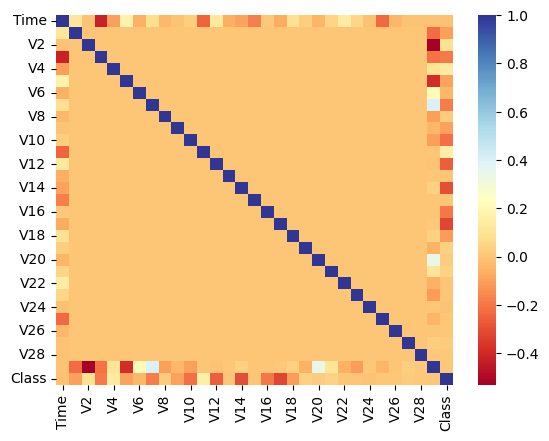

In [7]:
sns.heatmap(dataset.corr(numeric_only=True), cmap='RdYlBu')
plt.show()

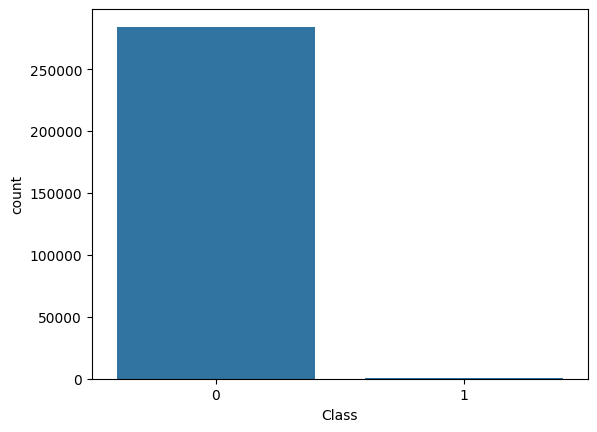

In [8]:
sns.countplot(data=dataset, x='Class')
plt.show()

In [9]:
(dataset["Class"].value_counts()/284807)*100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [10]:
X= dataset.drop("Class",axis=1)
y=dataset["Class"]

#### Handling the imbalanced dataset by Oversampling

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


#### Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
#stscale=StandardScaler()
X = scale.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)
X_train.shape,y_train.shape

((454904, 30), (454904,))

#### Model Training and Evaluation using Logistic regression

In [14]:
logreg=LogisticRegression(n_jobs=2,max_iter=500)
logreg.fit(X_train,y_train,)
log_pred=logreg.predict(X_test)
print("Accuracy_Score:",accuracy_score(log_pred,y_test))
print("F1-Score:", f1_score(log_pred,y_test))
print("Recall:",recall_score(log_pred,y_test))
print("Precison:",precision_score(log_pred,y_test))

Accuracy_Score: 0.976839069342103
F1-Score: 0.9765791720017073
Recall: 0.9908341302347401
Precison: 0.9627285636647324


#### Model Training and Evaluation using RandomForestclassifier

In [15]:
randcl=RandomForestClassifier(n_jobs=3)
randcl.fit(X_train,y_train)
rand_pred=randcl.predict(X_test)
print("Accuracy_Score:",accuracy_score(rand_pred,y_test))
print("F1-Score:", f1_score(rand_pred,y_test))
print("Recall:",recall_score(rand_pred,y_test))
print("Precison:",precision_score(rand_pred,y_test))

Accuracy_Score: 0.9999472416158135
F1-Score: 0.9999474090176004
Recall: 0.9998948235665328
Precison: 1.0
